# Assignment 1 for INFO 7390 submitted by Mitesh Desai NUID 002953596 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from numpy import exp, array, random, dot

In [3]:
## Using Parkinsons Data Classifcation test set : Courtesy Kaggle.com 

In [4]:
df = pd.read_csv("parkinsons.data")

In [5]:
print(df.shape)
df.head(5)

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
## Checking for null values 

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

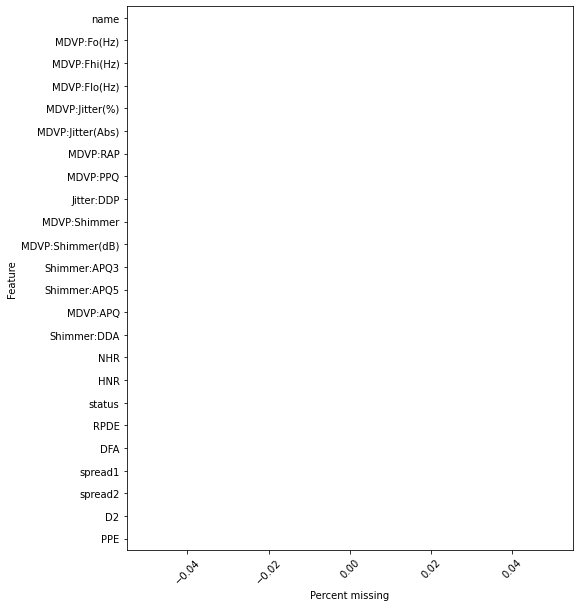

In [8]:
'''Calculate percentage null values for each column or feature'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [9]:
## Dropping insigificant & out of scale columns 

In [10]:
df1 = df.drop_duplicates().drop('name',axis=1).drop('MDVP:Fo(Hz)', axis=1).drop('MDVP:Fhi(Hz)', axis=1).drop('MDVP:Flo(Hz)',axis=1)

print(df1.shape)
df1.head(2)

(195, 20)


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [11]:
## Reshuffeling the data

In [12]:
df1 = df1.sample(frac=1).reset_index(drop=True)

In [13]:
## Creating inputs and labels

In [14]:
X = df1.loc[:, df1.columns!='status']


In [15]:
X

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,0.00769,0.00957,0.01016,0.02308,0.00300,26.415,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
1,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,0.01235,0.01495,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
2,0.00971,0.000070,0.00534,0.00478,0.01601,0.04978,0.483,0.02749,0.02466,0.03736,0.08247,0.03361,18.570,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
3,0.00495,0.000020,0.00302,0.00246,0.00905,0.02105,0.209,0.01107,0.01284,0.01604,0.03320,0.01048,21.864,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
4,0.01719,0.000090,0.00996,0.01027,0.02987,0.07118,0.722,0.03474,0.04580,0.06824,0.10422,0.08069,12.298,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
191,0.00761,0.000070,0.00349,0.00486,0.01046,0.02719,0.255,0.01483,0.01609,0.02067,0.04450,0.01036,21.028,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
192,0.00168,0.000010,0.00068,0.00092,0.00204,0.01064,0.097,0.00522,0.00632,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
193,0.00923,0.000070,0.00507,0.00463,0.01520,0.03111,0.308,0.01638,0.01759,0.02603,0.04914,0.02659,19.979,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247


In [16]:
import math

In [17]:
Y = df1['status'].T

In [18]:
Y


0      0
1      1
2      1
3      1
4      1
      ..
190    1
191    1
192    1
193    1
194    1
Name: status, Length: 195, dtype: int64

In [19]:
## Spliting the data into the Train & Test Sets 

In [20]:
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1-0.8) * X.shape[0])
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])
X_train

Total Number of rows in train: 156
Total Number of rows in test: 39


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,0.00769,0.00957,0.01016,0.02308,0.00300,26.415,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
1,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,0.01235,0.01495,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
2,0.00971,0.000070,0.00534,0.00478,0.01601,0.04978,0.483,0.02749,0.02466,0.03736,0.08247,0.03361,18.570,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
3,0.00495,0.000020,0.00302,0.00246,0.00905,0.02105,0.209,0.01107,0.01284,0.01604,0.03320,0.01048,21.864,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
4,0.01719,0.000090,0.00996,0.01027,0.02987,0.07118,0.722,0.03474,0.04580,0.06824,0.10422,0.08069,12.298,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.01813,0.000150,0.01117,0.00718,0.03351,0.04912,0.438,0.02610,0.02161,0.02916,0.07830,0.10748,19.075,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305
152,0.00874,0.000080,0.00398,0.00539,0.01193,0.03209,0.307,0.01789,0.01992,0.02454,0.05368,0.01180,20.767,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834
153,0.00369,0.000020,0.00205,0.00218,0.00616,0.01851,0.168,0.00938,0.01160,0.01491,0.02814,0.00340,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218
154,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [21]:
Y_train

0      0
1      1
2      1
3      1
4      1
      ..
151    1
152    1
153    1
154    1
155    0
Name: status, Length: 156, dtype: int64

In [22]:
X_test
X_test.shape

(39, 19)

In [23]:
Y_test

156    0
157    1
158    0
159    1
160    1
161    0
162    1
163    1
164    0
165    1
166    1
167    0
168    1
169    1
170    1
171    1
172    1
173    0
174    1
175    0
176    1
177    1
178    1
179    1
180    0
181    0
182    1
183    1
184    1
185    0
186    1
187    1
188    1
189    0
190    1
191    1
192    1
193    1
194    1
Name: status, dtype: int64

In [24]:
X1=X.iloc[[0]]
print(X1)
Y1=Y.iloc[[0]]

   MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
0         0.00205          0.000009   0.00114   0.00113     0.00342   

   MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
0       0.01457             0.129       0.00769       0.00957   0.01016   

   Shimmer:DDA    NHR     HNR     RPDE       DFA   spread1   spread2  \
0      0.02308  0.003  26.415  0.27685  0.673636 -7.496264  0.056844   

         D2       PPE  
0  2.003032  0.073581  


In [25]:
## Creating a function  to implement gradient & update weights based  single row of data

In [111]:
lamdb = 0.01

In [272]:
def train_single(xdata, ylabel, sw, ltype):
        #print("enters train single")
        lr = 0.01
        #getting output
        '''
        print("xdata")
        print(xdata)
        print("ylabel")
        print(ylabel)
        '''
        output = getoutput(xdata,sw)
        '''
        print("output")
        print(output)
        '''
        
        #calculating error
        error = ylabel - output
        '''
        print("error")
        print(error)
        '''
        #print(xdata.shape)
        single_loss, l1,l2 = loss(ylabel, output, sw)
        #calculating the adjustment
        
        if ltype == "Non":
            adjustment = dot(xdata.T , error * sig_grad(output))
        elif ltype == "L2":
            adjustment = dot(xdata.T , error * sig_grad(output)) + (lamdb*sw)
        else:
            adjustment = dot(xdata.T , error * sig_grad(output)) + (lamdb*np.abs(sw))
            
        #adjustment = dot(xdata.T , error)
        '''
        print("xdata.T")
        print(xdata.T)
        print("error*sig_grad(output)")
        print(error * sig_grad(output))
        print("adjustment")
        print(adjustment)
        print(output.shape)
        print(sig_grad(output).shape)
        print(adjustment.shape)
        print(synaptic_weights.shape)
        '''
        
        '''
        print("single_loss")
        print(single_loss)
        '''
        sw -= 0.01 * adjustment
        return sw, single_loss, l1, l2

In [273]:
## Creating a function  to train and iterate through all the  rows of data

In [274]:
def train(xdata, ylabel, length, iterations, sw, ltype):
    losses = []
    l1_losses = []
    l2_losses = []
    print("enters train")
    for j in range(iterations):
        loss = 0
        l1_loss = 0
        l2_loss = 0
        if j % 100 == 0:
            print("Iteration number: " + str(j))
        for i in range(length):
            x1 = xdata.iloc[[i]]
            y1 = ylabel.iloc[[i]]
            #print(x1.shape)
            #print(y1.shape)
            sw, sl,l1,l2 = train_single(x1.to_numpy(), y1.to_numpy().T, sw, ltype)
            loss = loss + sl
            l1_loss = l1_loss + l1
            l2_loss = l2_loss + l2
            #print("Loss: " + str(sl))
        #print("Average L2 Loss: " + str(l2_loss / length))
        losses.append(loss[0,0] / length)
        l1_losses.append(l1_loss / length)
        l2_losses.append(l2_loss / length)
    return sw, losses, l1_losses, l2_losses

In [275]:
## Creating a function  to get output with sigmoid function

In [276]:
def getoutput(inputs,sw):
    

    y1 = dot(inputs, sw)
    return sigmoid(y1)
    

In [277]:
## Creating sigmoid function

In [278]:
def sigmoid(x):
	#print(x)
	return 1 / (1 + exp(-x))

In [260]:
## Creating sig-grad function

In [261]:
def sig_grad(x):
        return x * (1 - x)

In [262]:
import math

In [263]:
## Creating Log Loss function along with L1 & L2 Regularization 

In [264]:
def loss(y, y_hat, sw):
  #print(y.shape)
  #print(y)
  #print(y_hat.shape)
  #print(y_hat)
    a = y[0]
    a_hat = y_hat[0,0]
    loss = -y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    l2 = (lamdb/2)*np.sum(np.square(sw))
    l1 = (lamdb/2)*np.sum(sw)
    return loss,l1,l2
    

In [265]:
## Creating a test function to get confusion matrix, Precison, Recall , Accuracy & F-1 Score 

In [266]:
def test(xdata, ylabel, length, synaptic_weights):
    count_total = 0
    count_correct = 0
    #label 1 is positive, label 0 is negative
    true_positive = 0
    false_positive = 0
    true_negative = 0    
    false_negative = 0
    
    
    for i in range(length):
        x1 = X.iloc[[i]]
        y1 = Y.iloc[[i]]
        output = getoutput(x1.to_numpy(), synaptic_weights)
        label = y1.to_numpy().T
        #print("output")
        #print(output)
        #print("label")
        #print(label)
        if output < 0.5:
            output = 0 
        else:
            output = 1
        
        if output == label:
            count_correct = count_correct + 1
        
        if output == 0 and label == 0:
            true_negative = true_negative + 1
            
        if output == 0 and label == 1:
            false_negative = false_negative + 1
            
        if output == 1 and label == 1:
            true_positive = true_positive + 1
            
        if output == 1 and label == 0:
            false_positive = false_positive + 1
            
        count_total = count_total + 1
        
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = (2 * precision * recall) / (precision + recall)
    accuracy = count_correct/count_total
        
    print('Accuracy is ' + str(accuracy))
    print( 'f1-score is '+ str(f1_score))
    

In [250]:
##Generating random weights for the 1st layer , training the Logical Regrssion Unit ( LRU1 ) without regularization

enters train
Iteration number: 0
Train Dataset
Accuracy is 0.7538461538461538
f1-score is 0.8596491228070176


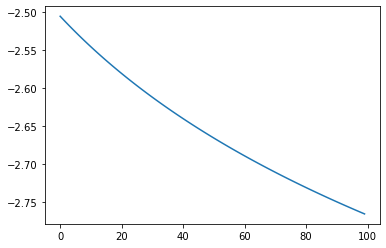

Test Dataset
Accuracy is 0.7948717948717948
f1-score is 0.8857142857142858


In [267]:
synaptic_weights = random.rand(19,1)
#print("synaptic_weights")
#print(synaptic_weights)
LRU1, losses, _, _ = train(X_train, Y_train, 156, 100, synaptic_weights, "Non")
print("Train Dataset")
test(X_train, Y_train, 195, synaptic_weights)
plt.plot(losses)
plt.show()
print("Test Dataset")
test(X_test, Y_test, 39, LRU1)

enters train
Iteration number: 0
Train Accuracy
Accuracy is 0.7538461538461538
f1-score is 0.8596491228070176


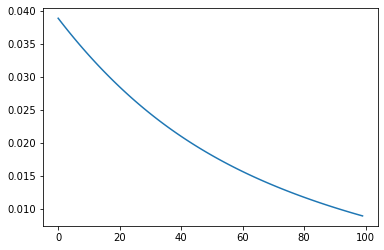

Test Dataset
Accuracy is 0.7948717948717948
f1-score is 0.8857142857142858


In [279]:
##Generating random weights for the 1st layer , training the Logical Regrssion Unit ( LRU1 ) with L1 regularization
synaptic_weights = random.rand(19,1)
LRU1, _, l1_losses, _ = train(X_train, Y_train, 156, 100, synaptic_weights, "L1")
print("Train Accuracy")
test(X_train, Y_train, 195, synaptic_weights)
plt.plot(l1_losses)
plt.show()
print("Test Dataset")
test(X_test, Y_test, 39, LRU1)

enters train
Iteration number: 0
Train Accuracy
Accuracy is 0.7538461538461538
f1-score is 0.8596491228070176


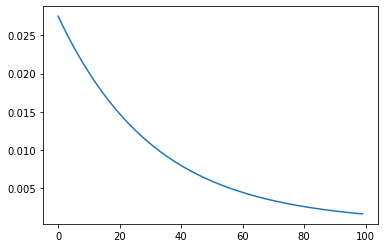

Test Dataset
Accuracy is 0.7948717948717948
f1-score is 0.8857142857142858


In [269]:
##Generating random weights for the 1st layer , training the Logical Regrssion Unit ( LRU1 ) with L2 regularization
synaptic_weights = random.rand(19,1)
LRU1, _, _, l2_losses = train(X_train, Y_train, 156, 100, synaptic_weights, "L2")
print("Train Accuracy")
test(X_train, Y_train, 195, synaptic_weights)
plt.plot(l2_losses)
plt.show()
print("Test Dataset")
test(X_test, Y_test, 39, LRU1)

In [45]:
##Re-creating LRU1 as LRU2  with ReLU Function

In [46]:
def ReLU(x):
    if x > 0:
        #print(x.shape)
        return x
    else:
        return np.zeros((1,1))
    
    #return x * (x > 0)

In [47]:
def ReLU_grad(x):
    if x > 0:
        return 1
    else:
        return 0.05
    

In [48]:
def getoutput2(inputs,sw):
    #print(inputs)
    #print(synaptic_weights)
    y1 = dot(inputs, sw)
    #print(y1.shape)
    return sigmoid(ReLU(y1))

In [49]:
def train2(xdata, ylabel, length, iterations, sw):
    losses = []
    for j in range(iterations):
        loss = 0
        if j % 100 == 0:
            print("Iteration number: " + str(j))
        for i in range(length):
            x1 = xdata.iloc[[i]]
            y1 = ylabel.iloc[[i]]
            sw, sl = train_single2(x1.to_numpy(), y1.to_numpy().T, sw)
            loss = loss + sl
        losses.append(loss / length)
    return sw, losses

In [50]:
def train_single2(xdata, ylabel, sw):
        lr = 0.01
        #getting output
        output = getoutput2(xdata,sw)
        #print(output)

        #calculating error
        error = ylabel - output
        #print(error)
        #print(xdata.shape)
        

        #calculating the adjustment
        adjustment = dot(xdata.T , error * output)
        #print(output.shape)
        #print(sig_grad(output).shape)
        #print(adjustment.shape)
        #print(synaptic_weights.shape)
        single_loss = loss2(ylabel, output)

        sw += 0.01* adjustment
        return sw, single_loss

In [51]:
def loss2(y, y_hat):
  #print(y.shape)
  #print(y)
  #print(y_hat.shape)
    if y_hat < 0.01:
        print(y_hat)
    loss2 = -y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    return loss2

In [52]:
#synaptic_weights = random.rand(19,1)
#LRU2, losses = train2(X_train, Y_train, 156, 1, synaptic_weights)
#test(X_test, Y_test, 39, LRU2)

In [53]:
synaptic_weights = random.rand(19,1)
LRU2, losses = train2(X_train, Y_train, 156, 300, synaptic_weights)
test(X_test, Y_test, 39, LRU2)

Iteration number: 0
Iteration number: 100
Iteration number: 200
Accuracy is 0.6666666666666666
f1-score is 0.7450980392156863


In [465]:
# To do the regularization using the L1 (Lasso) method and L2 (Ridge) method , 
# we will add a term to the loss function above as , 
# For L1  " This is Lambda times sum of  modulo  of weights " 
# For L2   "This is lambda times sum of the squares of the weights"
# We will also need to update the  gradient of the loss function to inculde this terms.
#Implented the same in LRU1